In [1]:
# Codes from learnopencv
# https://github.com/spmallick/learnopencv

import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV

sys.path.append(os.path.abspath("../"))
from utils import read_data, plot_data, plot_decision_function

Displaying data. Close window to continue


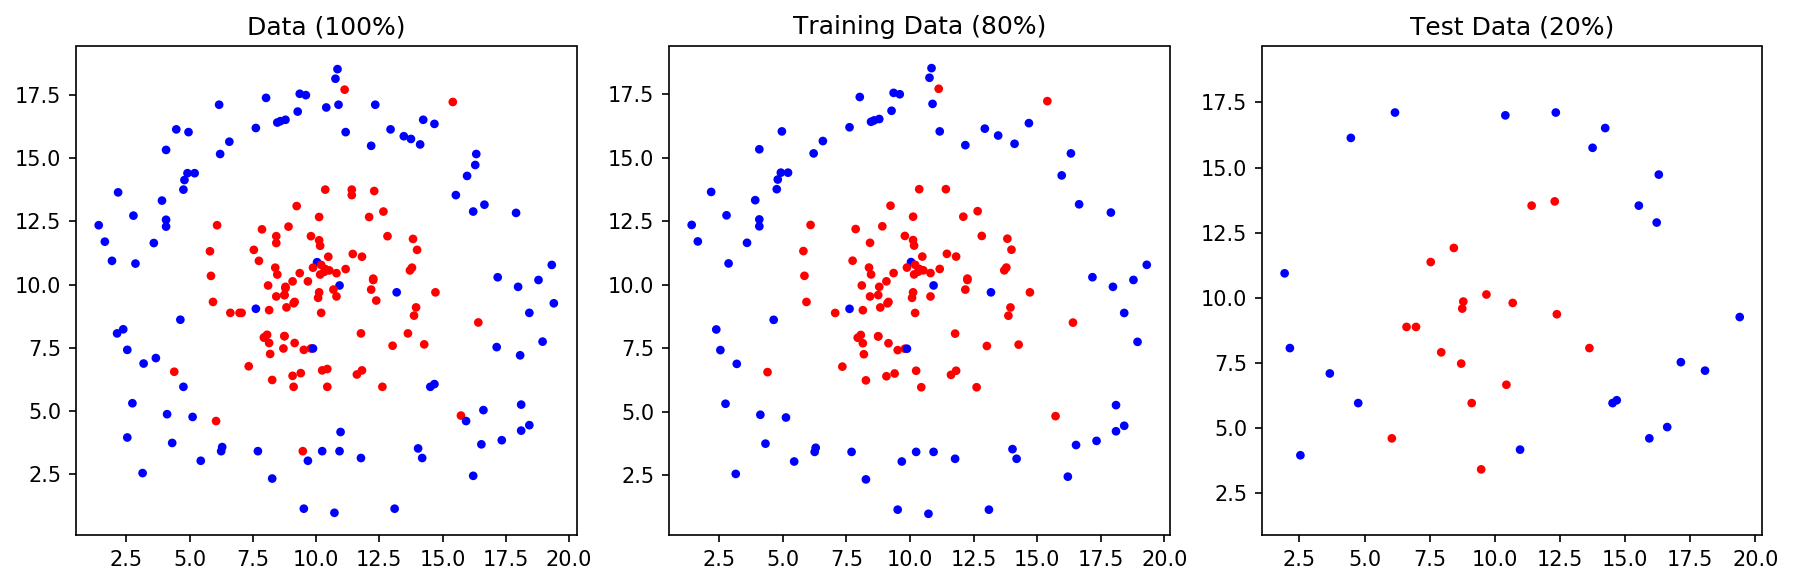

In [2]:
# Read data
x, labels = read_data("points_class_0.txt", "points_class_1.txt")

# Split data to train and test on 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size = 0.2, random_state=0)

print("Displaying data. Close window to continue")
# Plot data 
plot_data(X_train, y_train, X_test, y_test)

Training SVM ...
Displaying decision function. Close window to continue


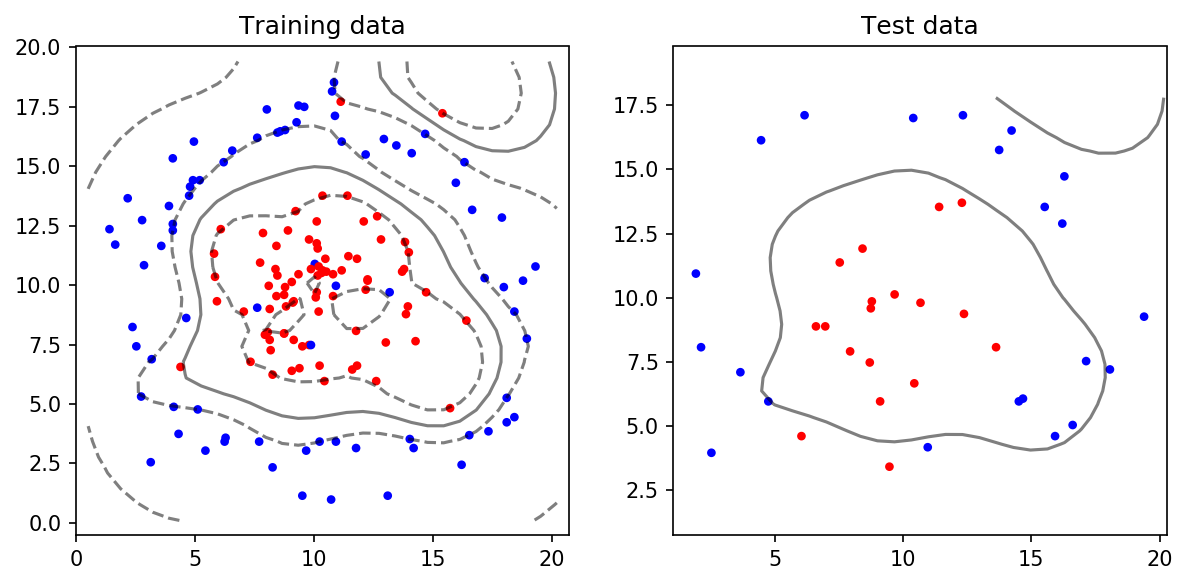

In [4]:
print("Training SVM ...")
# make a classifier
clf = svm.SVC(C = 10.0, kernel='rbf', gamma=0.1)

# Train classifier
clf.fit(X_train, y_train)

# Make predictions on unseen test data
clf_predictions = clf.predict(X_test)

print("Displaying decision function. Close window to continue")
# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf)

Performing grid search ... 
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters:
 {'C': 1, 'gamma': 0.01}
Best Estimators:
 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Displaying decision function for best estimator. Close window to continue.


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.1s finished
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


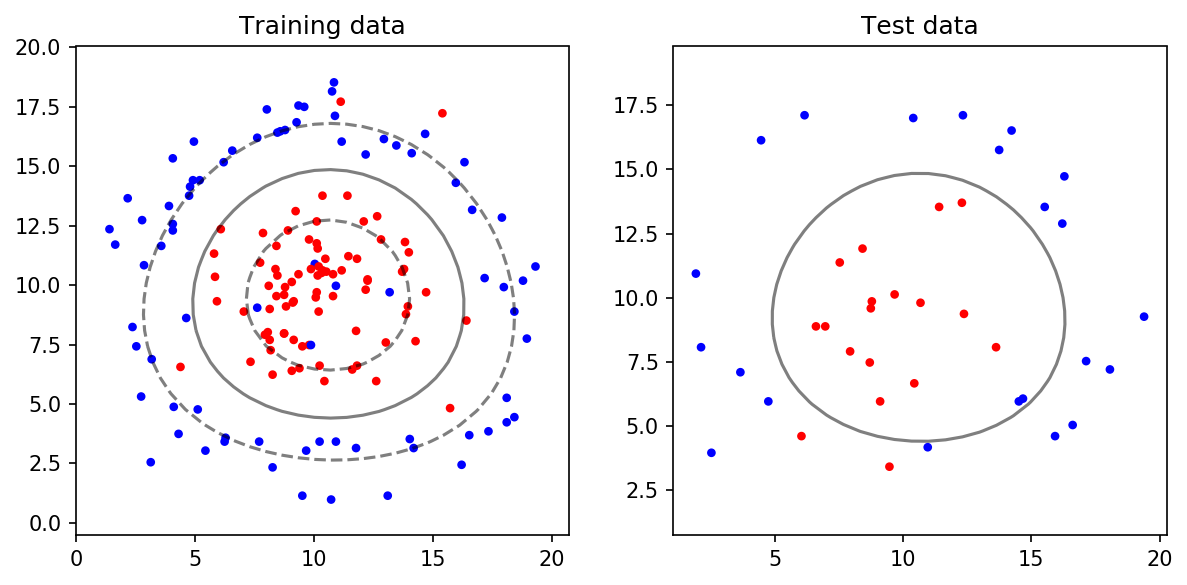

In [5]:
# Grid Search
print("Performing grid search ... ")

# Parameter Grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}

# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)

# Train the classifier
clf_grid.fit(X_train, y_train)

# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

print("Displaying decision function for best estimator. Close window to continue.")
# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf_grid)